In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv("/content/drive/MyDrive/Credit Risk Analysis/german_credit_data_with_target.csv")
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [43]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [44]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [45]:
""" PERFORMING EXPLORATORY DATA ANALYSIS """

' PERFORMING EXPLORATORY DATA ANALYSIS '

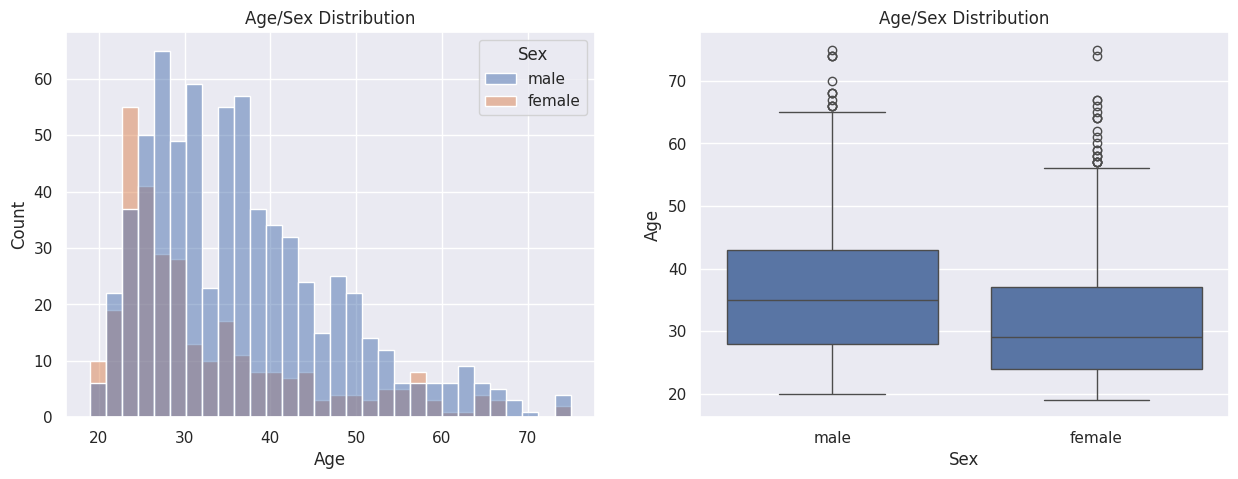

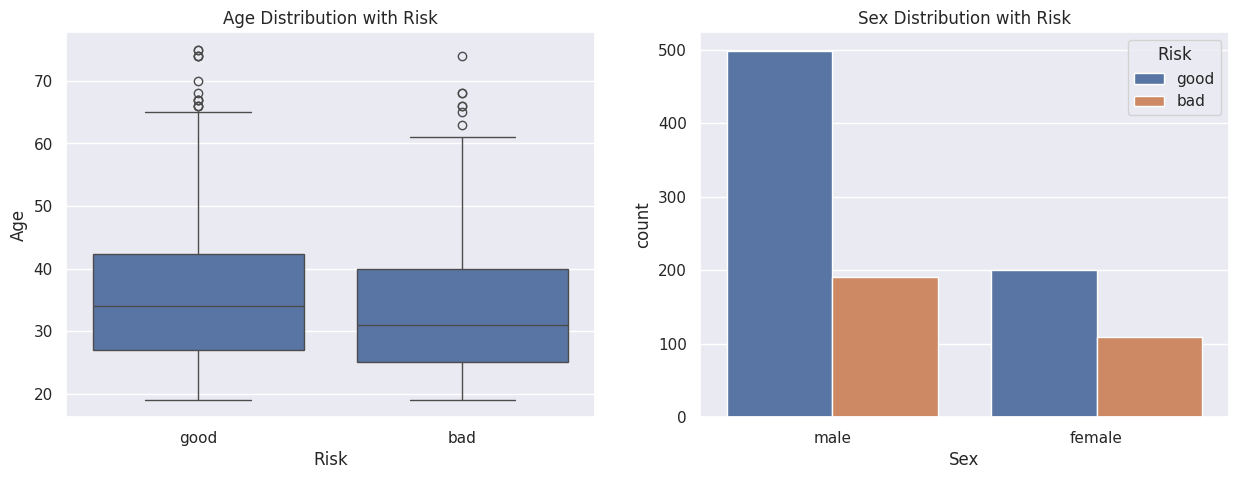

In [46]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");


In [47]:
# Define a function to map the job numbers to their descriptions using if-else statements
def job_description_encoder(job_code):
    if job_code == 0:
        return 'unskilled and non-resident'
    elif job_code == 1:
        return 'unskilled and resident'
    elif job_code == 2:
        return 'skilled'
    elif job_code == 3:
        return 'highly skilled'
    else:
        return 'unknown'

# Apply the function to create a new column 'Job Description'
df['Job Description'] = df['Job'].apply(job_description_encoder)

# Display the first few rows to verify the new column
df[['Job', 'Job Description']].head()


,Job,Job Description
0,2,skilled
1,2,skilled
2,1,unskilled and resident
3,2,skilled
4,2,skilled


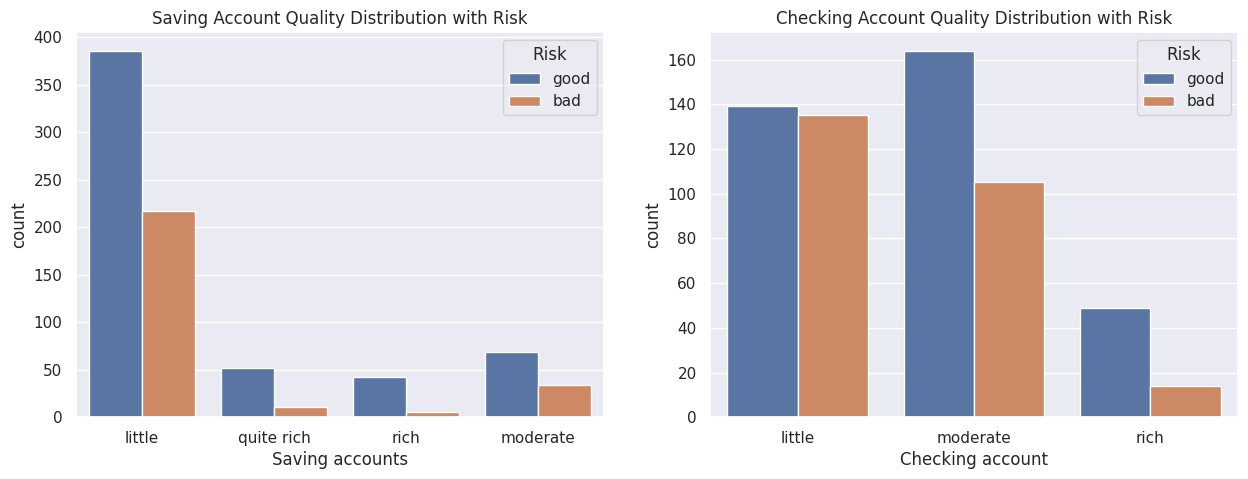

In [48]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=df, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");


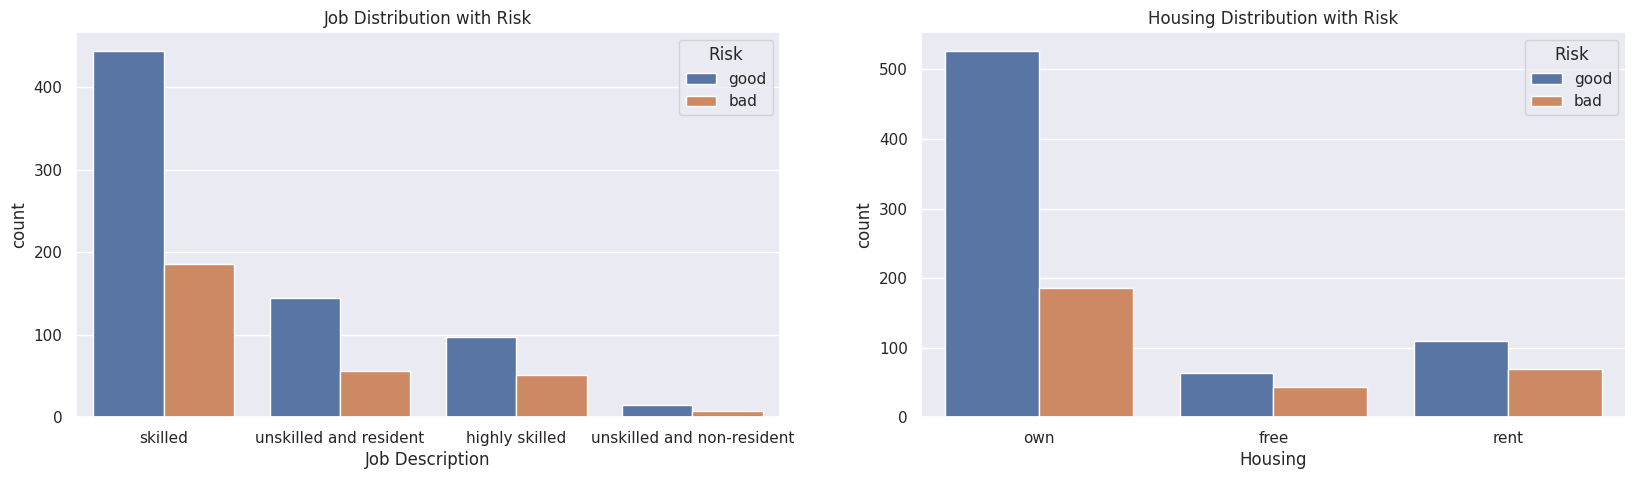

In [49]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(data=df, x="Job Description", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

In [50]:
""" PERFORMING DATA PRE-PROCESSING """

' PERFORMING DATA PRE-PROCESSING '

In [51]:
# label encode account quality and fill NaN with 0
def H_LabelEncoder(text):
    if text == "free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

df["Housing"] = df["Housing"].apply(H_LabelEncoder)
print(df['Housing'])


0      2
1      2
2      2
3      0
4      0
      ..
995    2
996    2
997    2
998    0
999    2
Name: Housing, Length: 1000, dtype: int64


In [52]:
# label encode account quality and fill NaN with 0
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

df["Saving accounts"] = df["Saving accounts"].apply(SC_LabelEncoder)
df["Checking account"] = df["Checking account"].apply(SC_LabelEncoder)

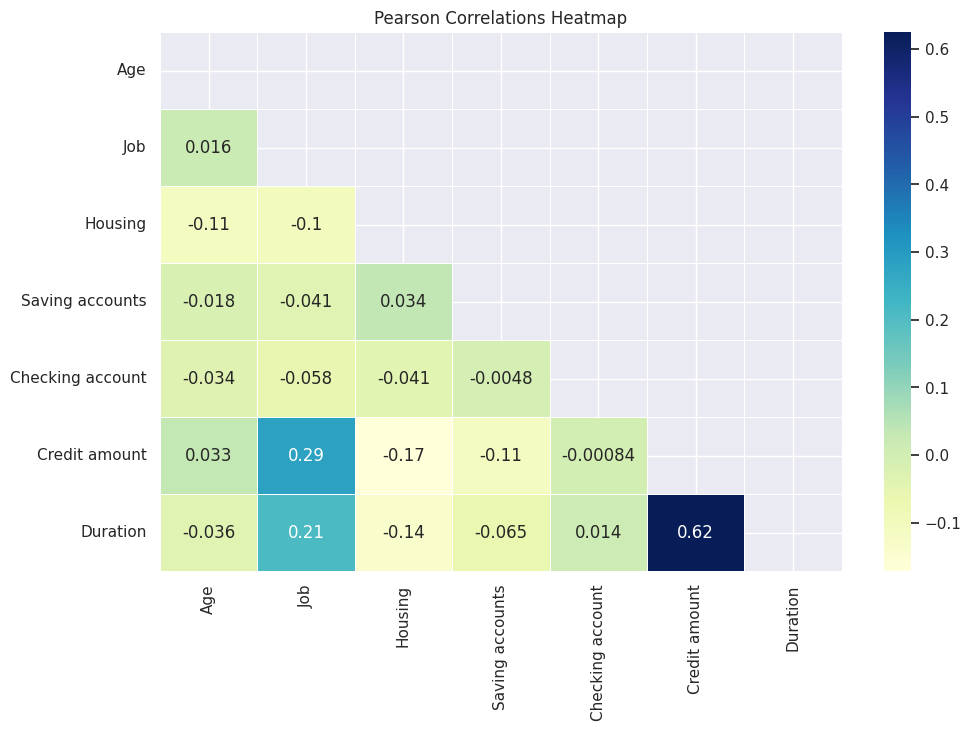

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']].corr()

# Set the size of the heatmap
sns.set(rc={'figure.figsize':(11, 7)})

# Create the heatmap with the corrected mask
sns.heatmap(corr, linewidths=.5, annot=True, cmap="YlGnBu", mask=np.triu(np.ones_like(corr, dtype=bool))) \
    .set_title("Pearson Correlations Heatmap")

# Show the plot
plt.show()


In [54]:
""" Label Encoding Categorical Data """

' Label Encoding Categorical Data '

In [55]:
# use LabelEncoder() to encode other categorical columns:
for col in ["Sex", "Purpose", "Risk"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])


In [56]:
df.drop('Job Description', axis=1, inplace=True)

In [57]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,2,0,1,1169,6,5,1
1,1,22,0,2,2,1,2,5951,48,5,0
2,2,49,1,1,2,1,0,2096,12,3,1
3,3,45,1,2,0,1,1,7882,42,4,1
4,4,53,1,2,0,1,1,4870,24,1,0
5,5,35,1,1,0,0,0,9055,36,3,1
6,6,53,1,2,2,3,0,2835,24,4,1
7,7,35,1,3,1,1,2,6948,36,1,1
8,8,61,1,1,2,4,0,3059,12,5,1
9,9,28,1,3,2,1,2,5234,30,1,0


In [23]:
 """  TRAIN-TEST SPLIT """

x = df.iloc[:,:-1]
y = df.iloc[:,-1]





In [58]:
y.value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [25]:
"""from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('Risk', axis=1)
y = df['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMote to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the shape of the original and resampled data
print(f'Original training set shape: {X_train.shape, y_train.shape}')
print(f'Resampled training set shape: {X_train_smote.shape, y_train_smote.shape}')
"""

Original training set shape: ((800, 10), (800,))
Resampled training set shape: ((1118, 10), (1118,))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters found: {best_params}')

# Train the RandomForestClassifier with the best parameters on the full training set
best_rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters found: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.48      0.49      0.49        59
           1       0.79      0.78      0.78       141

    accuracy                           0.69       200
   macro avg       0.63      0.64      0.64       200
weighted avg       0.70      0.69      0.70       200



In [ ]:
from sklearn.metrics import accuracy_score
# Train the RandomForestClassifier with the best parameters on the full training set
best_rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.695


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300,500],
    'learning_rate': [0.01, 0.1, 0.2, 1, 2,5,10,20, 50],
    'max_depth': [5, 10, 20, 50, 100, 200, 250],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initialize XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best estimator
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.715


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300,500],
    'learning_rate': [0.01, 0.1, 0.2, 1, 2,5,10,20, 50],
    'max_depth': [5, 10, 20, 50, 100, 200, 250],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initialize XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters found: {best_params}')

# Train the XGBoostClassifier with the best parameters on the full training set
best_xgb.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Fitting 5 folds for each of 6048 candidates, totalling 30240 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.745


In [ ]:

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters found: {best_params}')

# Train the XGBoostClassifier with the best parameters on the full training set
best_xgb.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, average='binary')
recall = recall_score(y_test, y_pred, pos_label=1, average='binary')
f1 = f1_score(y_test, y_pred, pos_label=1, average='binary')

# Print performance metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.745
Precision: 0.8040540540540541
Recall: 0.8439716312056738
F1 Score: 0.823529411764706
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.51      0.54        59
           1       0.80      0.84      0.82       141

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



In [28]:
""" CLUSTERING APPROACH """




' CLUSTERING APPROACH '

In [59]:
cdf = pd.read_csv("/content/drive/MyDrive/Credit Risk Analysis/german_credit_data_with_target.csv")



cdf = df.drop("Risk", axis = 1)
cdf.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,2,0,1,1169,6,5
1,1,22,0,2,2,1,2,5951,48,5
2,2,49,1,1,2,1,0,2096,12,3
3,3,45,1,2,0,1,1,7882,42,4
4,4,53,1,2,0,1,1,4870,24,1
5,5,35,1,1,0,0,0,9055,36,3
6,6,53,1,2,2,3,0,2835,24,4
7,7,35,1,3,1,1,2,6948,36,1
8,8,61,1,1,2,4,0,3059,12,5
9,9,28,1,3,2,1,2,5234,30,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

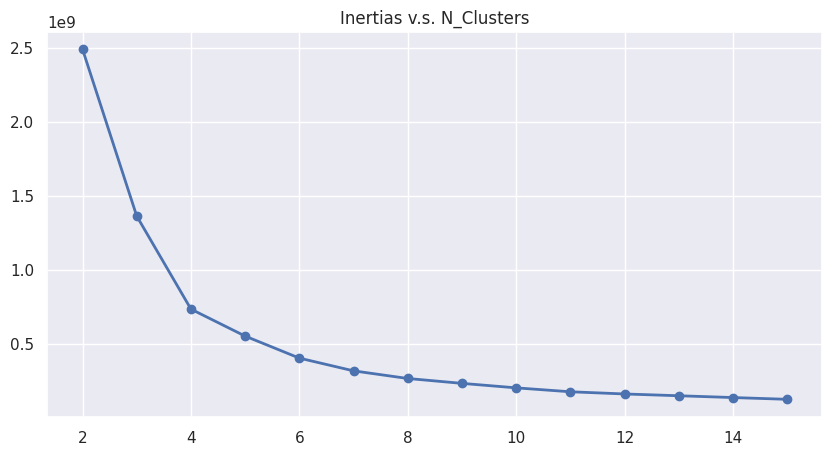

In [60]:
""" finding the best number of clusters for optimum solution b/w 2 and 16 clusters """

inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cdf)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

In [61]:
""" Analysis: The "elbow" in above chart is indicated at 4. The number of clusters chosen should therefore be 4. """

' Analysis: The "elbow" in above chart is indicated at 4. The number of clusters chosen should therefore be 4. '

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-62-3b843bbd8a66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


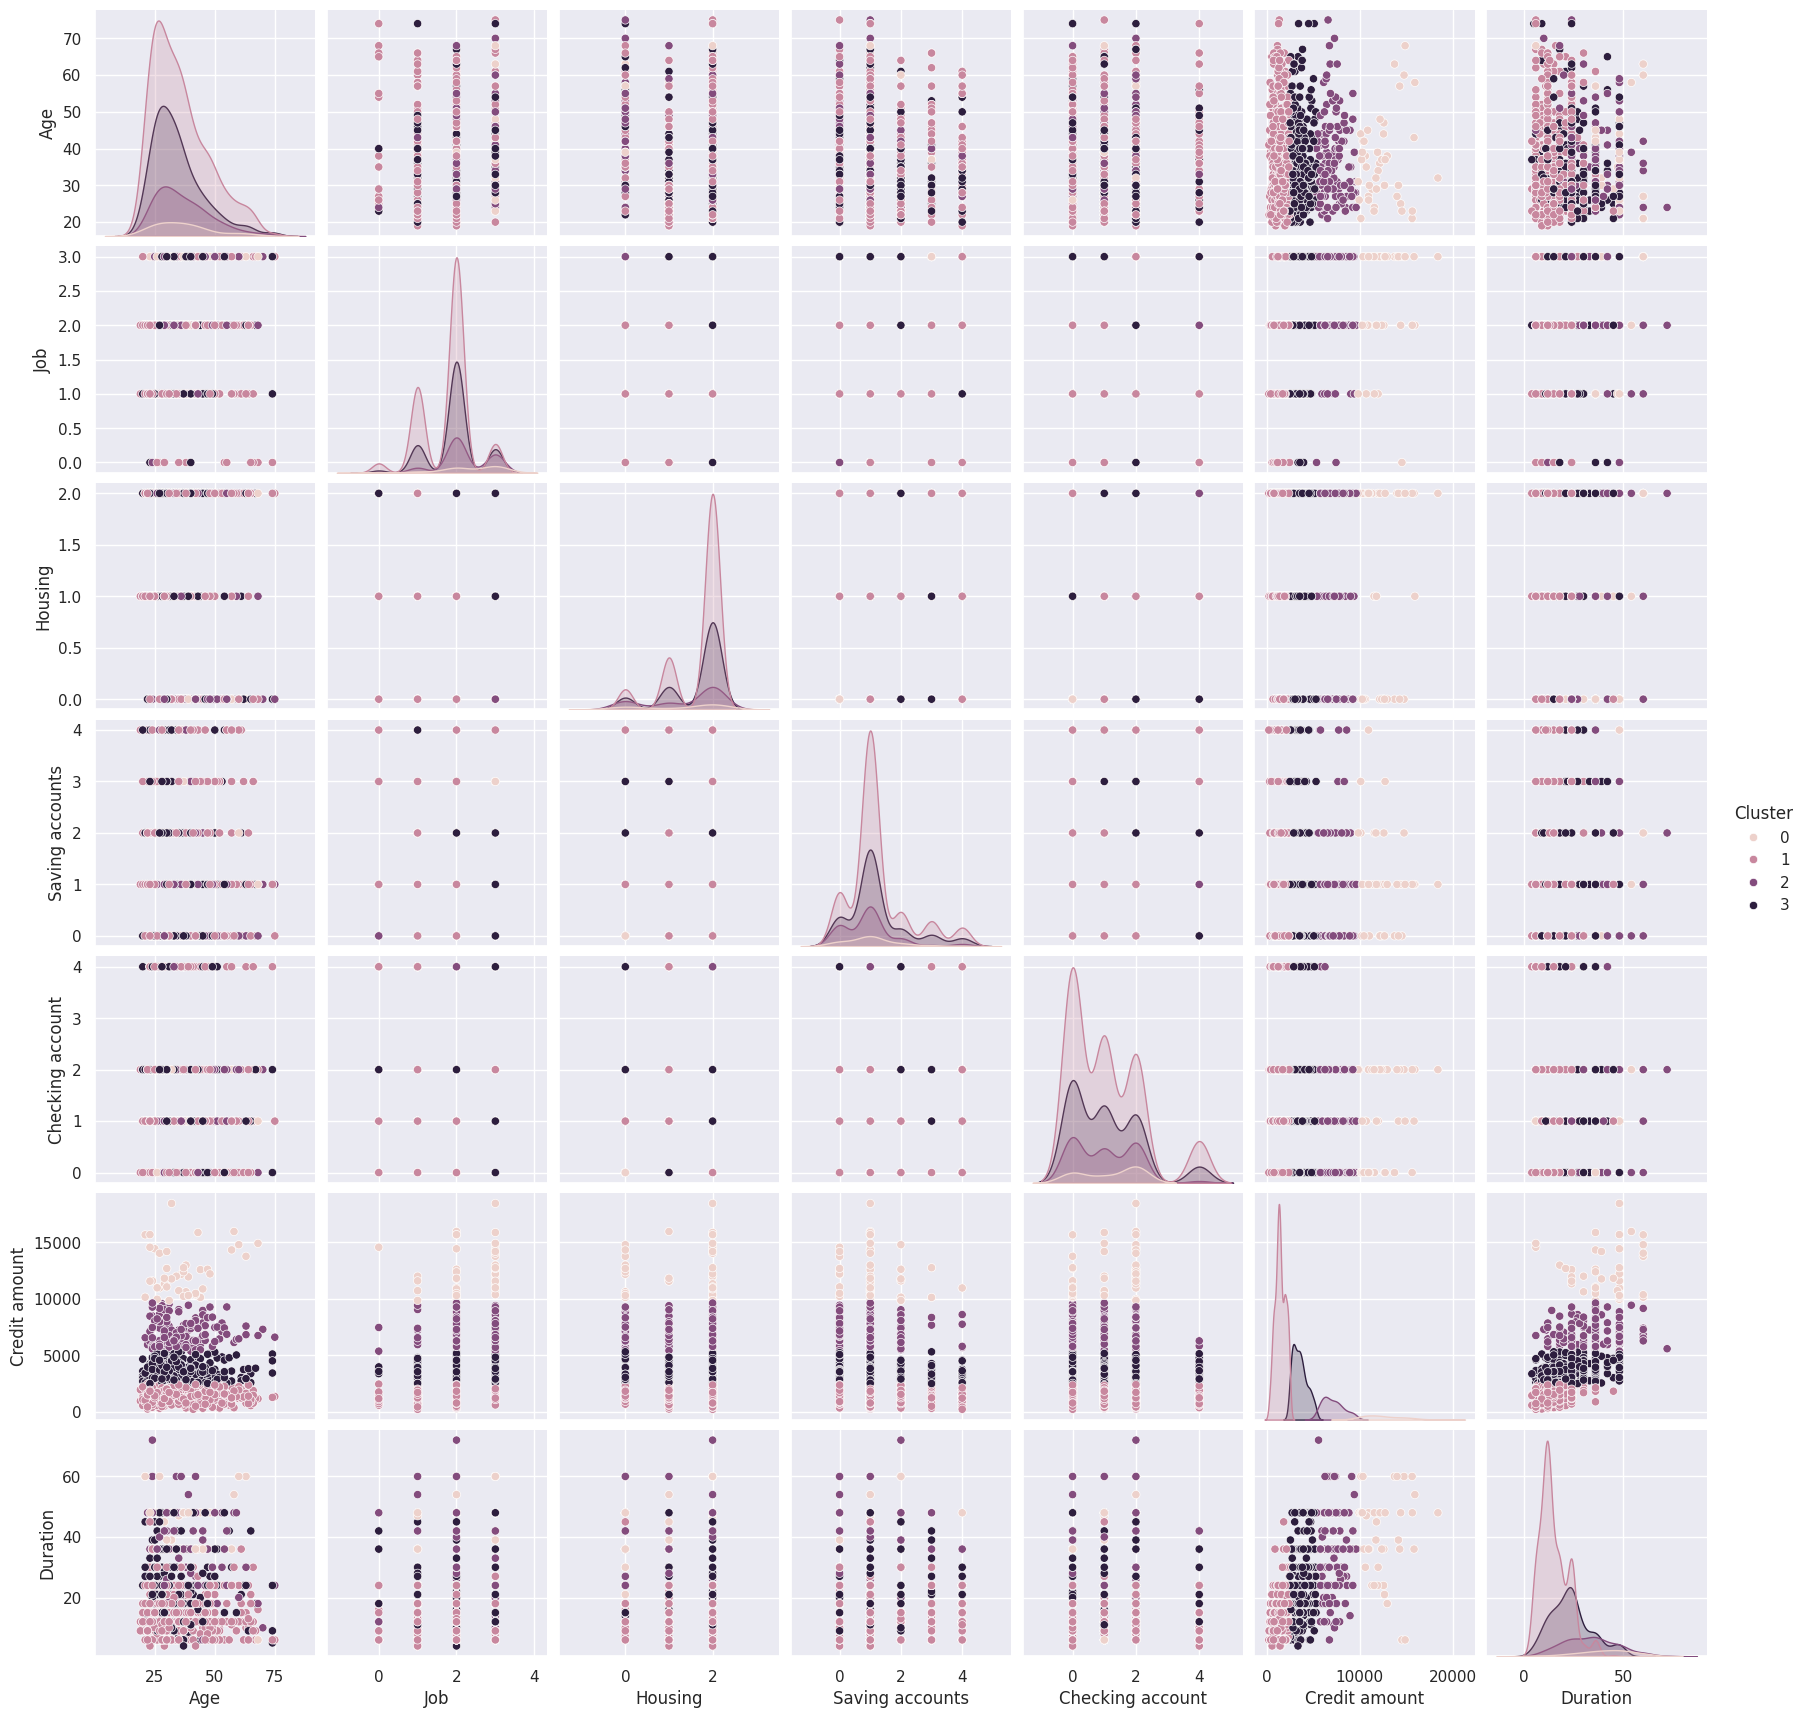

In [62]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(cdf)
df_clustered = cdf[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', "Cluster"]], hue="Cluster");

In [63]:
""" BUT SINCE THERE ARE ONLY Categories in output,
i.e : "good" and "bad", therefore we are using 2 cluster classification model """

' BUT SINCE THERE ARE ONLY Categories in output, \ni.e : "good" and "bad", therefore we are using 2 cluster classification model '

In [64]:
X, y = df.drop("Risk", axis=1), df["Risk"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [65]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test))
    if score > max_score:
        max_k = k
        max_score = score

display(Markdown("If use K-Nearest Neighbors Classification, the k should be " + str(max_k) + " to get best prediction, and then the  mean accuracy is " + str(max_score)))

If use K-Nearest Neighbors Classification, the k should be 69 to get best prediction, and then the  mean accuracy is 0.8352941176470587

In [68]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Define models
Models = {
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianNaiveBayes": GaussianNB()
}

# Initialize a list to collect results
cv_results_list = []

for key in Models.keys():
    cv_res = model_selection.cross_validate(Models[key], X_train, y_train,
                                             return_train_score=True,
                                             scoring="f1",
                                             cv=5, n_jobs=-1)
    res = {
        'model': key,
        'train_score': cv_res["train_score"].mean(),
        'test_score': cv_res["test_score"].mean(),
        'fit_time': cv_res["fit_time"].mean(),
        'score_time': cv_res["score_time"].mean(),
        }
    cv_results_list.append(res)
    print("CV for model:", key, "done.")

# Convert results list to DataFrame
cv_results = pd.DataFrame(cv_results_list)

cv_results


CV for model: SVC done.
CV for model: DecisionTree done.
CV for model: RandomForest done.
CV for model: GaussianNaiveBayes done.


,model,train_score,test_score,fit_time,score_time
0,SVC,0.824370,0.822577,0.080937,0.025797
1,DecisionTree,1.000000,0.760919,0.019970,0.010589
2,RandomForest,1.000000,0.825001,0.717599,0.038392
3,GaussianNaiveBayes,0.797433,0.791708,0.008982,0.012031


In [70]:
""" from the above result it is sage to assume that Random Forest is the
best Model for this problem statement considering the dataset"""

' from the above result it is sage to assume that Random Forest is the\nbest Model for this problem statement considering the dataset'

In [71]:
rf = Models["RandomForest"].fit(X_train, y_train)
print('f1_score:', f1_score(y_test, rf.predict(X_test)))

f1_score: 0.8284789644012944
